In [1]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

### 원본 이미지 확인

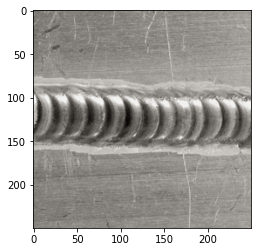

In [2]:
image = cv2.imread('./data/weld1.jpeg')
plt.imshow(image)

### 노이즈 데이터 추가

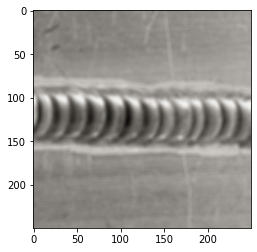

In [63]:
# 블러 - 실행할 때마다 랜덤 숫자를 생성하여 블러를 넣습니다.
def blur(image):
    filtersize = random.randrange(3,11)
    low_pass_filter = np.ones((filtersize, filtersize), np.float32) / filtersize**2
    dst = cv2.filter2D(image, -1, low_pass_filter)
    return dst

blur_image = blur(image)
plt.imshow(blur_image)

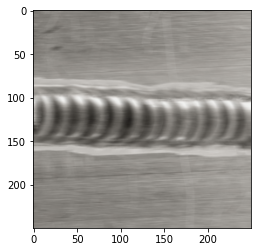

In [64]:
# 모션 블러 - 실행할 때마다 랜덤 숫자를 생성하여 움직이는 듯한 블러 효과를 줍니다.
def motion_blur(image):
    size = random.randrange(5,15)
    motion_blur = np.zeros((size, size))
    motion_blur[int((size-1)/2), :] = np.ones(size)
    motion_blur = motion_blur / size
    dst = cv2.filter2D(image, -1, motion_blur)
    
    return dst

motion_image = motion_blur(image)
plt.imshow(motion_image)

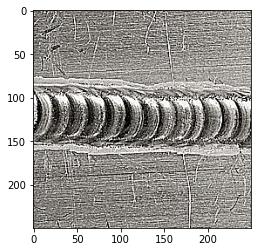

In [65]:
# 샤프닝 - 실행할 때마다 랜덤 숫자를 생성하여 샤프닝 효과를 줍니다.
def sharpening(image):
    rand = random.randrange(1,4)
    if rand == 1:
        mask = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    elif rand == 2:
        mask = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    else:
        mask = np.array([[-1, -1, -1, -1, -1],
                         [-1, 2, 2, 2, -1],
                         [-1, 2, 9, 2, -1],
                         [-1, 2, 2, 2, -1],
                         [-1, -1, -1, -1, -1]]) / 9.0
    dst = cv2.filter2D(image, -1, mask)
    return dst

sharpening_image = sharpening(image)
plt.imshow(sharpening_image)

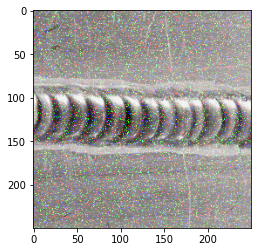

In [66]:
# 가우시안 노이즈 - 실행할 때마다 랜덤 숫자를 생성하여 가우시안 노이즈를 추가합니다.
def gaussian_noise(image):
    rand = random.randrange(0,11)*0.1+0.5
    gauss = np.random.normal(0,rand,image.size)
    gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
    # Add the Gaussian noise to the image
    image_gauss = cv2.add(image,gauss)
    return image_gauss
gaussian_image = gaussian_noise(image)
plt.imshow(gaussian_image)

### 노이즈 데이터 생성
위에서 확인한 노이즈 생성 모듈을 사용하여, 정상-비정상 데이터셋을 생성합니다.

In [68]:
# 위에서 확인한 노이즈 생성 함수들을 랜덤으로 호출하여 노이즈 데이터를 생성하고, 동일한 개수의 원본 데이터를 복제하여 데이터셋을 생성합니다.
def generate_data(number):
    duplicated_original_images = []
    noise_images = []
    for i in range(number):
        idx = random.randrange(1,5)
        if idx == 1:
            img = blur(image)
        elif idx == 2:
            img = motion_blur(image)
        elif idx == 3:
            img = sharpening(image)
        else:
            img = gaussian_noise(image)
        
        duplicated_original_images.append(image)
        noise_images.append(img)
    return duplicated_original_images, noise_images

normal, abnormal = generate_data(20)

### 생성한 데이터셋(정상 - 비정상) 중 각 5개씩만 출력해봅니다.

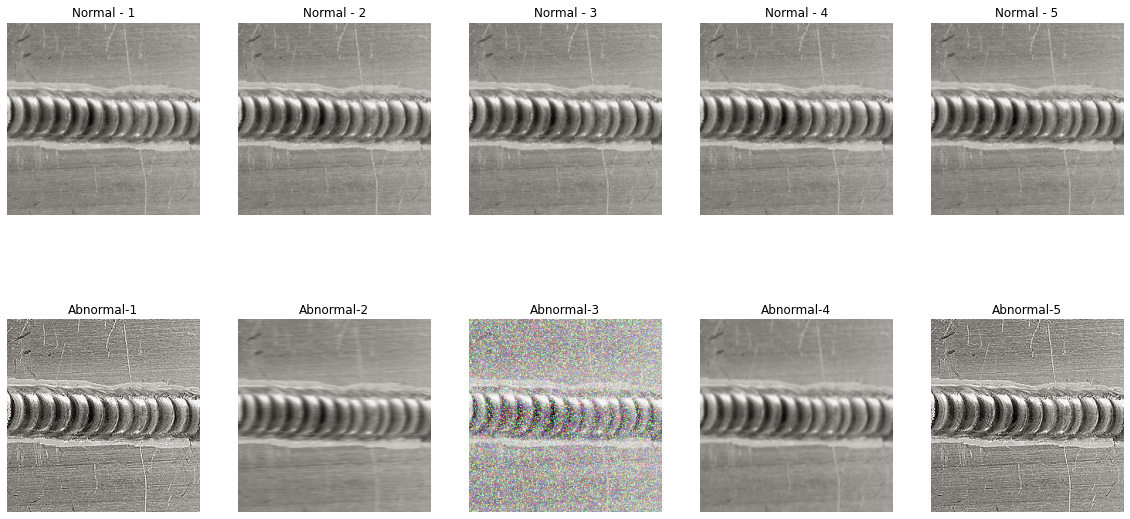

In [71]:
fig = plt.figure(figsize=(20,10))
rows = 2
cols = 5

for i in range(5): # 정상 데이터 5개 출력
    ax = fig.add_subplot(rows,cols,i+1)
    ax.imshow(normal[i])
    ax.set_title("Normal - "+ str(i+1))
    ax.axis("off")
    
for i in range(5): # 비정상 데이터 5개 출력
    ax = fig.add_subplot(rows,cols,i+6)
    ax.imshow(abnormal[i])
    ax.set_title("Abnormal-"+ str(i+1))
    ax.axis("off")
 
plt.show()


## 분류 모델 학습

In [ ]:
ㅑㅡㅁ